In [21]:
import os

In [22]:
pip install tf_keras

Note: you may need to restart the kernel to use updated packages.


In [23]:
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

In [26]:
assert os.getenv('TF_USE_LEGACY_KERAS') == 'True', "TF_USE_LEGACY_KERAS environment variable not set correctly"

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [55]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [7]:
pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: explainable-ai-sdk, tensorflow-cloud, tensorflow-decision-forests, tensorflow-serving-api, tensorflow-text, tf_keras, witwidget
Note: you may need to restart the kernel to use updated packages.


In [29]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [30]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred", #labes are directory names
    label_mode="categorical", #more than 2 class
    color_mode="rgb",
    batch_size=32, #at time 32 images and labes are fed
    image_size=(128, 128),
)

Found 70295 files belonging to 38 classes.


In [31]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred", #labes are directory names
    label_mode="categorical", #more than 2 class
    color_mode="rgb",
    batch_size=32, #at time 32 images and labes are fed
    image_size=(128, 128)
)

Found 17572 files belonging to 38 classes.


In [32]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [33]:
cnn = tf.keras.models.Sequential()

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [35]:
cnn.add(tf.keras.layers.Dropout(0.25)) #to drop some of the neurons
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [36]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [37]:
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")

Found a GPU with the name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Found a GPU with the name: PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')


In [38]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5


2024-06-03 04:43:27.756067: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2197/2197 [==============================] - 149s 66ms/step - loss: 1.3232 - accuracy: 0.6110 - val_loss: 0.4333 - val_accuracy: 0.8622
Epoch 2/5
2197/2197 [==============================] - 144s 66ms/step - loss: 0.4276 - accuracy: 0.8638 - val_loss: 0.3132 - val_accuracy: 0.8972
Epoch 3/5
2197/2197 [==============================] - 146s 66ms/step - loss: 0.2567 - accuracy: 0.9169 - val_loss: 0.2033 - val_accuracy: 0.9332
Epoch 4/5
2197/2197 [==============================] - 144s 66ms/step - loss: 0.1809 - accuracy: 0.9414 - val_loss: 0.1869 - val_accuracy: 0.9393
Epoch 5/5
2197/2197 [==============================] - 149s 68ms/step - loss: 0.1324 - accuracy: 0.9546 - val_loss: 0.1359 - val_accuracy: 0.9552


In [39]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 45s 20ms/step - loss: 0.0629 - accuracy: 0.9803
Training accuracy: 0.9803115725517273


In [40]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 12s 21ms/step - loss: 0.1359 - accuracy: 0.9552
Validation accuracy: 0.9551559090614319


In [41]:
training_history.history

{'loss': [1.3232101202011108,
  0.4276103973388672,
  0.25665509700775146,
  0.18094684183597565,
  0.13236433267593384],
 'accuracy': [0.6109538078308105,
  0.8638452291488647,
  0.9169073104858398,
  0.9414041042327881,
  0.9546055793762207],
 'val_loss': [0.43333956599235535,
  0.31319379806518555,
  0.2033153474330902,
  0.18690373003482819,
  0.13587112724781036],
 'val_accuracy': [0.8622239828109741,
  0.8971659541130066,
  0.9332460761070251,
  0.939335286617279,
  0.9551559090614319]}

In [42]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


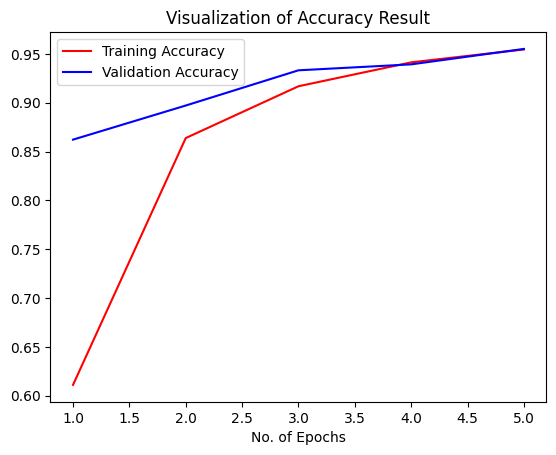

In [44]:
epochs = [i for i in range(1,6)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [46]:
class_name = validation_set.class_names
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [47]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 44s 2ms/step


In [48]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [49]:
Y_true
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [50]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [51]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.94      0.95       504
                                 Apple___Black_rot       0.95      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.96      0.97       440
                                   Apple___healthy       0.96      0.94      0.95       502
                               Blueberry___healthy       0.92      0.99      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.96      0.98      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.95      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.92      0.

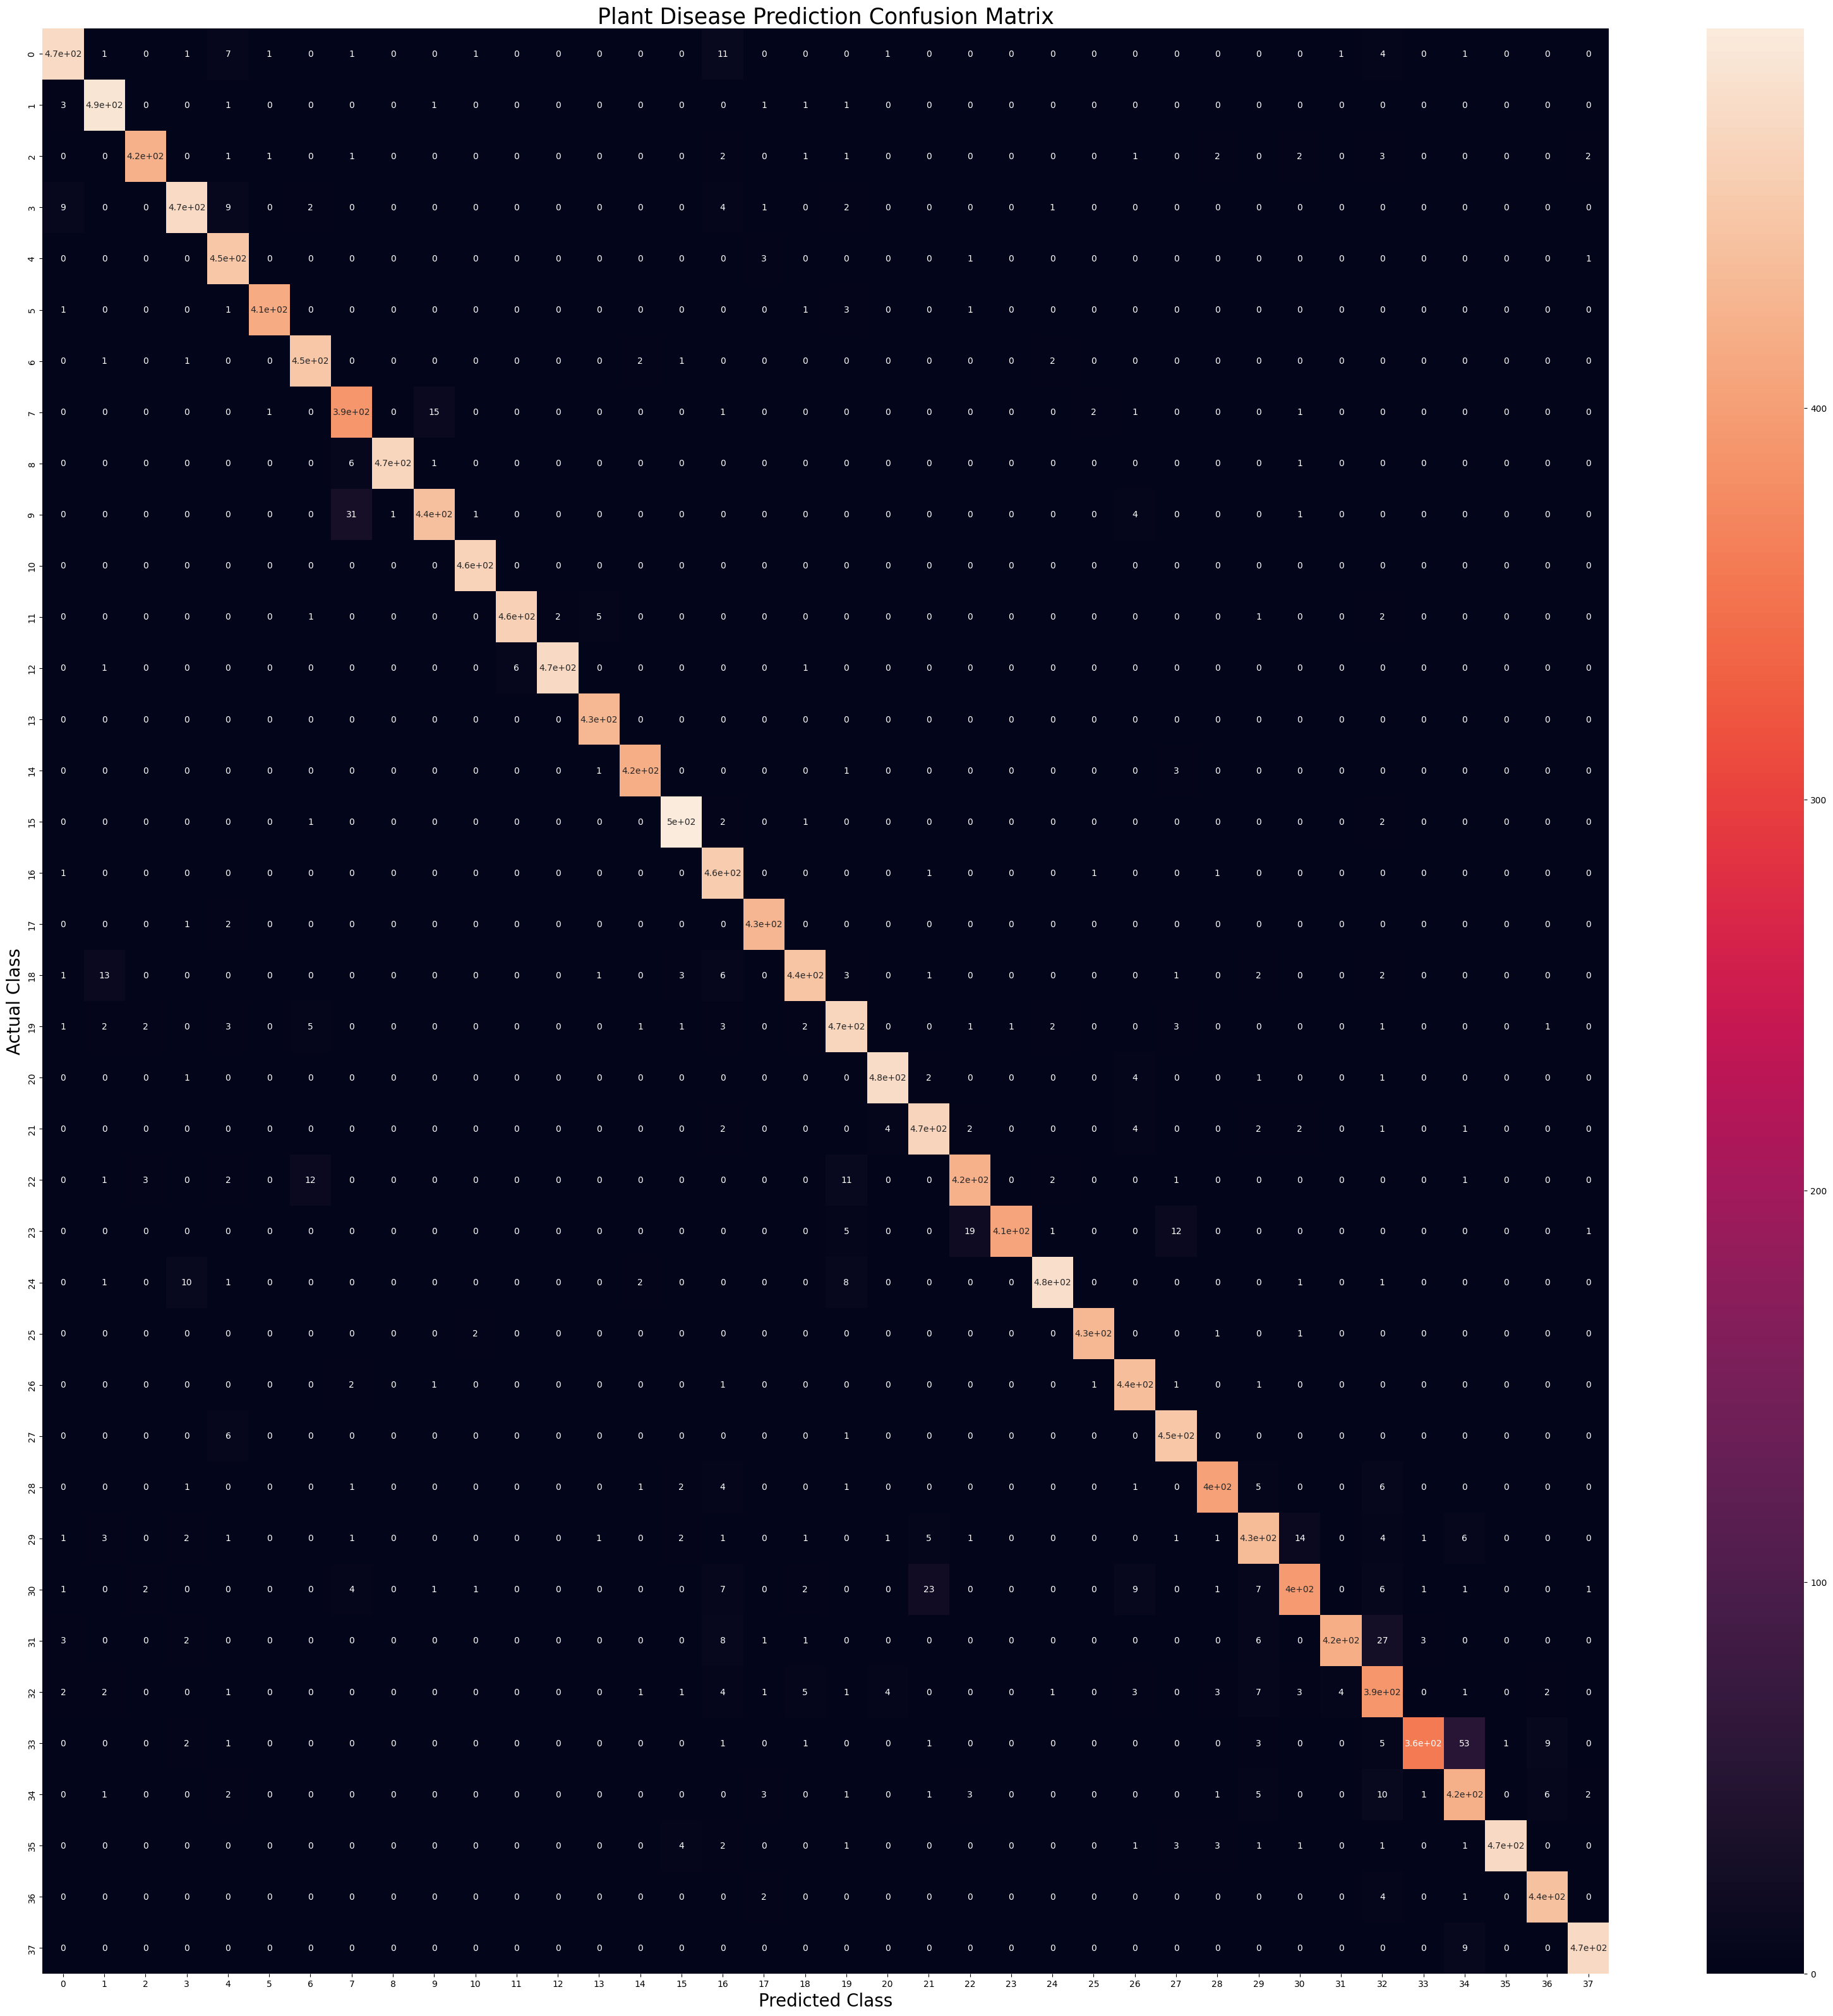

In [52]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

***Testing***

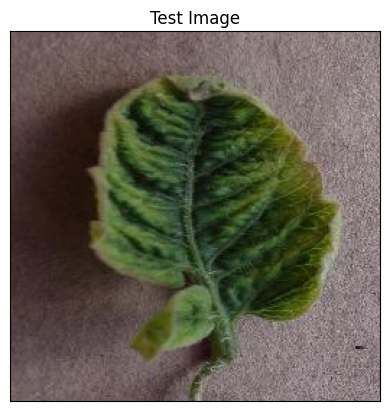

In [61]:
#Test Image Visualization
import cv2
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [62]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 22ms/step


In [63]:
print(predictions)

[[5.4466780e-14 2.5909510e-14 1.7904282e-11 5.9122065e-12 9.2008507e-14
  7.0771054e-12 2.1905268e-14 1.9951214e-14 2.4512424e-15 2.8731059e-14
  3.0266744e-14 2.4126287e-10 8.0489289e-11 8.2791878e-11 3.1258260e-14
  1.2453022e-10 2.2623487e-13 9.1056254e-16 9.7774389e-10 1.7309121e-12
  1.3054604e-15 6.3413541e-10 7.6337011e-13 1.2910265e-08 1.3851093e-11
  2.7820795e-12 1.3273048e-10 2.0457854e-12 1.5959686e-09 2.2391765e-08
  4.1582974e-12 1.4386996e-10 1.4887047e-09 1.9981043e-09 7.0147457e-09
  1.0000000e+00 7.7873000e-11 1.5494229e-13]]


In [64]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

35


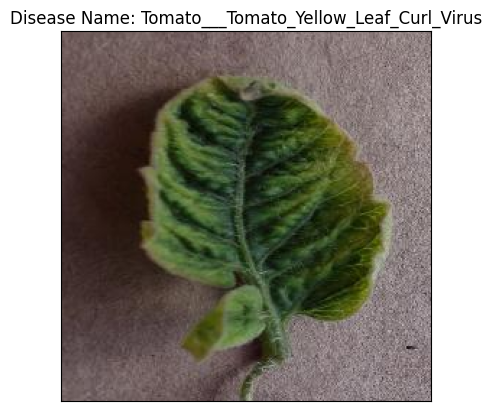

In [65]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()